# Erkundung der Image Data Resource

Um Bilder von der [Image Data Resource (IDR)](https://idr.openmicroscopy.org/) herunterzuladen, benötigen Sie nur einen Link, z.B. für die Anforderung der Daten im TIF-Format. Sie können dann [scikit-image](https://scikit-image.org/) verwenden, um das Bild zu öffnen.

Einige der unten gezeigten Codebeispiele wurden von der [IDR API-Website](https://idr.openmicroscopy.org/about/api.html) adaptiert, die von der University of Dundee & Open Microscopy Environment unter der [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/) lizenziert ist.

Im folgenden Beispiel laden wir Bilddaten von Stojic et al herunter, die unter der [CC BY 4.0 Lizenz](https://creativecommons.org/licenses/by/4.0/) geteilt und von der IDR unter dieser URL verfügbar sind: https://idr.openmicroscopy.org/webclient/?show=screen-2302 Siehe auch die zugehörige Veröffentlichung: https://www.nature.com/articles/s41467-020-14978-7

In [1]:
from skimage.io import imread, imshow
import json
import requests


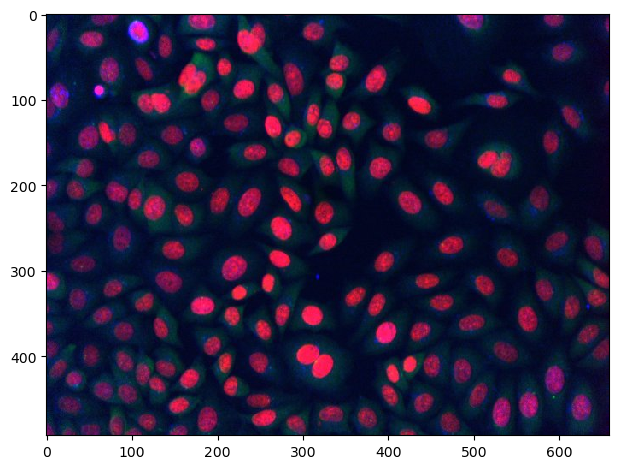

In [2]:
original_link = 'https://idr.openmicroscopy.org/webclient/render_image_download/9629351/?format=tif'
edited_link = 'https://idr.openmicroscopy.org/webclient/render_image/9629351/'

image = imread(edited_link)

imshow(image)

Darüber hinaus können Sie den Link aus einem generischen Link zusammensetzen, wenn Sie die Bildkennung des Bildes kennen, das Sie herunterladen möchten.

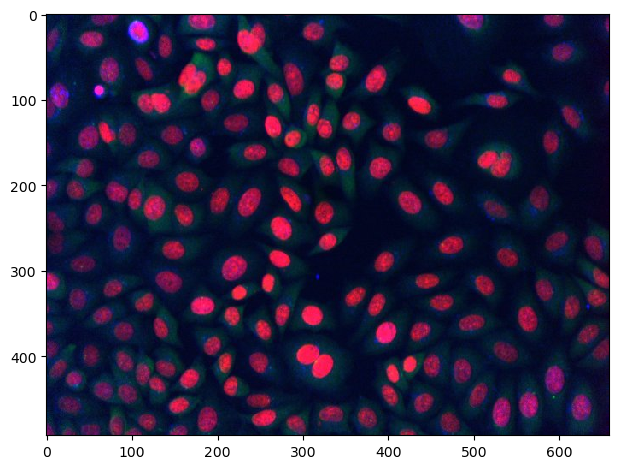

In [3]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"
image_id = 9629351

# combine generic url with image ID
image_url = generic_image_url.format(**{"image_id":image_id})

# download and show image
image = imread(image_url)
imshow(image)

Die IDR [Application Programming Interface (API)](https://idr.openmicroscopy.org/about/api.html) ermöglicht es Ihnen auch, technisch durch die Datenbank zu navigieren. Das oben gezeigte Bild ist Teil des Screens 2303. Zunächst werden wir uns die mit diesem Datensatz bereitgestellten Metadaten-Annotationen ansehen.

In [4]:
# configure which dataset to browse
screen_id = 2302
MAP_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&{type}={screen_id}"

# open an interface to the internet
with requests.Session() as session:

    # turn the generic MAP_URL into a specific URL for the screen
    qs = {'type': 'screen', 'screen_id': screen_id}
    url = MAP_URL.format(**qs)

    # go throuh all annotations and print them out
    for a in session.get(url).json()['annotations']:
        namespace = a['ns']
        for v in a['values']:
            key = v[0]
            value = v[1]
            print (key, value)

Screen A https://idr.openmicroscopy.org/webclient/?show=screen-2301
Screen B https://idr.openmicroscopy.org/webclient/?show=screen-2302
Screen C https://idr.openmicroscopy.org/webclient/?show=screen-2303
Overview https://idr.openmicroscopy.org/webclient/?show=screen-2304
Sample Type cell
Organism Homo sapiens
Study Title Identification of long noncoding RNAs in regulation of cell division
Study Type high content screen
Screen Type primary screen
Screen Technology Type RNAi screen
Imaging Method spinning disk confocal microscopy
Publication Title A long noncoding RNA regulates microtubule behaviour during mitosis
Publication Authors Stojic L, Lun ATL, Mascalchi P, Ernst C, Redmond AM, Mangei J, Cooper S, Barr AR, Taylor C, Franklin VNR, Bakal C, Marioni JC, Odom DT, Gergely F
PubMed ID 32296040 https://www.ncbi.nlm.nih.gov/pubmed/32296040
PMC ID PMC7160116 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7160116
Publication DOI 10.1038/s41467-020-14978-7 https://doi.org/10.1038/s41467-020-1

Als Nächstes können wir durch Unterdatensätze gehen. Wir betrachten einen [High-Content-Screening](https://en.wikipedia.org/wiki/High-content_screening) (HCS) Datensatz, der typischerweise in Platten organisiert ist. Eine for-Schleife ermöglicht es uns, einen Blick auf die verfügbaren Platten zu werfen.

In [5]:
PLATES_URL = "https://idr.openmicroscopy.org/webclient/api/plates/?id={screen_id}"
qs = {'screen_id': screen_id}

# assemble a specific ULR from the generic URL
url = PLATES_URL.format(**qs)

# go through all plates
for p in session.get(url).json()['plates']:
    plate_id = p['id'] # note, we will use this variable further down
    print (p['id'], p['name'], p['childCount'])

7361 1977 1
7368 1978 1
7366 1981 1
7367 1982 1
7379 1983 0
7369 1984 1
7371 1985 1
7370 1986 1
7372 1987 1
7375 1988 1


Platten sind in Wells organisiert (in der digitalen Welt könnte man sie Tabellen nennen), und so können wir auf ähnliche Weise durch alle Wells gehen wie durch Platten. Diesmal werden wir nach der ersten Reihe von Bildern aufhören, um nur ein paar kleine Vorschaubilder von ihnen zu sehen. Es ist sinnvoll, Vorschaubilder anzuschauen, solange Sie nicht die vollständigen Bilddaten benötigen und nur durch die Datenbank browsen.



9762957


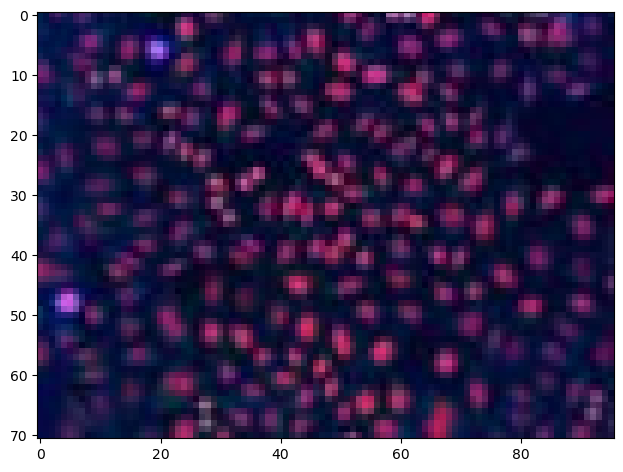

In [6]:
WELLS_IMAGES_URL = "https://idr.openmicroscopy.org/webgateway/plate/{plate_id}/{field}/"
THUMBNAIL_URL = "https://idr.openmicroscopy.org/webclient/render_thumbnail/{image_id}/"

qs = {'plate_id': plate_id, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()
rowlabels = grid['rowlabels']
collabels = grid['collabels']

# go through the well of images.
for row in grid['grid']:
    for cell in row:
        if cell is not None:
            # read image specific information we will use this variable further down
            image_id = cell['id']

            # print image ID and show thumbnail
            print(image_id)
            thumbnail = imread(THUMBNAIL_URL.format(**{'image_id':image_id}))
            imshow(thumbnail)

            # leave after first image
            break

    # leave after first row
    break

Um das gesamte Bild abzurufen, können wir den oben gezeigten Code verwenden.

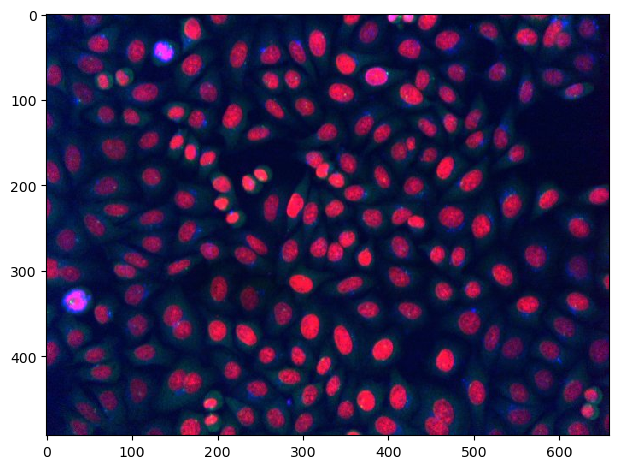

In [7]:
generic_image_url = "https://idr.openmicroscopy.org/webclient/render_image/{image_id}/"

# combine generic url with image ID
image_url = generic_image_url.format(**{"image_id":image_id})

# download and show image
image = imread(image_url)
imshow(image)

Darüber hinaus können wir die Metadaten mit [json](https://www.json.org/json-en.html) ausgeben. Hinweis: Wir können die Metadaten ansehen, ohne das Bild herunterzuladen.

In [8]:
qs = {'image_id': image_id}
IMAGE_DETAILS_URL = "https://idr.openmicroscopy.org/webclient/imgData/{image_id}/"
url = IMAGE_DETAILS_URL.format(**qs)
r = session.get(url)
if r.status_code == 200:
    print (json.dumps(r.json(), indent=4, sort_keys=True))

{
    "channels": [
        {
            "active": true,
            "coefficient": 1.0,
            "color": "FF0000",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "alpha-tubulin (microtubule cytoskeleton)",
            "reverseIntensity": false,
            "window": {
                "end": 187.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "coefficient": 1.0,
            "color": "00FF00",
            "emissionWave": null,
            "family": "linear",
            "inverted": false,
            "label": "gamma-tubulin (centrosomes)",
            "reverseIntensity": false,
            "window": {
                "end": 342.0,
                "max": 65535.0,
                "min": 0.0,
                "start": 0.0
            }
        },
        {
            "active": true,
            "co